In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

In [3]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

In [4]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

In [5]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)

In [6]:
model = SoftmaxClassifierModel()

In [7]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [8]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [9]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [10]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.203667
Epoch    1/20 Cost: 1.199645
Epoch    2/20 Cost: 1.142985
Epoch    3/20 Cost: 1.117769
Epoch    4/20 Cost: 1.100901
Epoch    5/20 Cost: 1.089523
Epoch    6/20 Cost: 1.079872
Epoch    7/20 Cost: 1.071320
Epoch    8/20 Cost: 1.063325
Epoch    9/20 Cost: 1.055720
Epoch   10/20 Cost: 1.048377
Epoch   11/20 Cost: 1.041245
Epoch   12/20 Cost: 1.034285
Epoch   13/20 Cost: 1.027478
Epoch   14/20 Cost: 1.020813
Epoch   15/20 Cost: 1.014279
Epoch   16/20 Cost: 1.007872
Epoch   17/20 Cost: 1.001586
Epoch   18/20 Cost: 0.995419
Epoch   19/20 Cost: 0.989365


In [11]:
test(model, optimizer, x_test, y_test)

Accuracy: 0.0% Cost: 1.425844


In [12]:
model = SoftmaxClassifierModel()

In [13]:
optimizer = optim.SGD(model.parameters(), lr=1e5)

In [14]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 976950.625000
Epoch    2/20 Cost: 1279135.125000
Epoch    3/20 Cost: 1198379.250000
Epoch    4/20 Cost: 1098825.625000
Epoch    5/20 Cost: 1968197.625000
Epoch    6/20 Cost: 284763.125000
Epoch    7/20 Cost: 1532260.000000
Epoch    8/20 Cost: 1651504.250000
Epoch    9/20 Cost: 521878.437500
Epoch   10/20 Cost: 1397263.125000
Epoch   11/20 Cost: 750986.250000
Epoch   12/20 Cost: 918691.750000
Epoch   13/20 Cost: 1487888.125000
Epoch   14/20 Cost: 1582260.125000
Epoch   15/20 Cost: 685818.000000
Epoch   16/20 Cost: 1140048.750000
Epoch   17/20 Cost: 940566.750000
Epoch   18/20 Cost: 931638.125000
Epoch   19/20 Cost: 1971322.625000


In [15]:
model = SoftmaxClassifierModel()

In [16]:
optimizer = optim.SGD(model.parameters(), lr=1e-10)

In [17]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 3.187324
Epoch    2/20 Cost: 3.187324
Epoch    3/20 Cost: 3.187324
Epoch    4/20 Cost: 3.187324
Epoch    5/20 Cost: 3.187324
Epoch    6/20 Cost: 3.187324
Epoch    7/20 Cost: 3.187324
Epoch    8/20 Cost: 3.187324
Epoch    9/20 Cost: 3.187324
Epoch   10/20 Cost: 3.187324
Epoch   11/20 Cost: 3.187324
Epoch   12/20 Cost: 3.187324
Epoch   13/20 Cost: 3.187324
Epoch   14/20 Cost: 3.187324
Epoch   15/20 Cost: 3.187324
Epoch   16/20 Cost: 3.187324
Epoch   17/20 Cost: 3.187324
Epoch   18/20 Cost: 3.187324
Epoch   19/20 Cost: 3.187324


In [18]:
model = SoftmaxClassifierModel()

In [19]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [20]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 1.198802
Epoch    2/20 Cost: 1.150877
Epoch    3/20 Cost: 1.131977
Epoch    4/20 Cost: 1.116242
Epoch    5/20 Cost: 1.102514
Epoch    6/20 Cost: 1.089676
Epoch    7/20 Cost: 1.077479
Epoch    8/20 Cost: 1.065775
Epoch    9/20 Cost: 1.054511
Epoch   10/20 Cost: 1.043655
Epoch   11/20 Cost: 1.033187
Epoch   12/20 Cost: 1.023091
Epoch   13/20 Cost: 1.013356
Epoch   14/20 Cost: 1.003968
Epoch   15/20 Cost: 0.994917
Epoch   16/20 Cost: 0.986189
Epoch   17/20 Cost: 0.977775
Epoch   18/20 Cost: 0.969661
Epoch   19/20 Cost: 0.961836


In [21]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [22]:
mu = x_train.mean(dim=0)

In [23]:
sigma = x_train.std(dim=0)

In [24]:
norm_x_train = (x_train - mu) / sigma

In [25]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [26]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [27]:
model = MultivariateLinearRegressionModel()

In [28]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [29]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [30]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29785.089844
Epoch    1/20 Cost: 18906.166016
Epoch    2/20 Cost: 12054.675781
Epoch    3/20 Cost: 7702.029785
Epoch    4/20 Cost: 4925.733398
Epoch    5/20 Cost: 3151.632812
Epoch    6/20 Cost: 2016.996094
Epoch    7/20 Cost: 1291.051270
Epoch    8/20 Cost: 826.505249
Epoch    9/20 Cost: 529.207397
Epoch   10/20 Cost: 338.934082
Epoch   11/20 Cost: 217.153564
Epoch   12/20 Cost: 139.206757
Epoch   13/20 Cost: 89.313835
Epoch   14/20 Cost: 57.375465
Epoch   15/20 Cost: 36.928429
Epoch   16/20 Cost: 23.835773
Epoch   17/20 Cost: 15.450429
Epoch   18/20 Cost: 10.077787
Epoch   19/20 Cost: 6.633700


In [31]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [32]:
model = MultivariateLinearRegressionModel()

In [33]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [34]:
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29477.810547
Epoch    2/20 Cost: 18798.513672
Epoch    3/20 Cost: 12059.365234
Epoch    4/20 Cost: 7773.400391
Epoch    5/20 Cost: 5038.264160
Epoch    6/20 Cost: 3290.066406
Epoch    7/20 Cost: 2171.882568
Epoch    8/20 Cost: 1456.434692
Epoch    9/20 Cost: 998.598267
Epoch   10/20 Cost: 705.595398
Epoch   11/20 Cost: 518.073608
Epoch   12/20 Cost: 398.057220
Epoch   13/20 Cost: 321.242920
Epoch   14/20 Cost: 272.078186
Epoch   15/20 Cost: 240.609177
Epoch   16/20 Cost: 220.465637
Epoch   17/20 Cost: 207.570602
Epoch   18/20 Cost: 199.314804
Epoch   19/20 Cost: 194.028214
Epoch   20/20 Cost: 190.642029


In [35]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [37]:
# parameters
training_epochs = 15
batch_size = 100

In [38]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

9920512it [00:00, 12777349.52it/s]                             


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 408773.21it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 3359781.64it/s]                             


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 86054.03it/s]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/torchvision/datasets/mnist.py:335: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-1w2ckjjv/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [39]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [40]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [41]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [42]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534912467
Epoch: 0002 cost = 0.359308600
Epoch: 0003 cost = 0.331088215
Epoch: 0004 cost = 0.316574246
Epoch: 0005 cost = 0.307130277
Epoch: 0006 cost = 0.300207853
Epoch: 0007 cost = 0.294897258
Epoch: 0008 cost = 0.290830433
Epoch: 0009 cost = 0.287419528
Epoch: 0010 cost = 0.284589082
Epoch: 0011 cost = 0.281816214
Epoch: 0012 cost = 0.279919654
Epoch: 0013 cost = 0.277836829
Epoch: 0014 cost = 0.276022345
Epoch: 0015 cost = 0.274443209
Learning finished


Accuracy: 0.8867999911308289
Label:  8
Prediction:  3


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


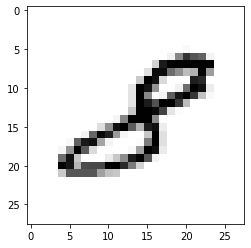

In [43]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()